In [3]:
# --- Boyer-Moore ---

NO_CHARACTERS = 256

def badCharH(P):
    sizeP = len(P)
    bmBc = [0] * NO_CHARACTERS
    # for i in range(NO_CHARACTERS):
    #     bmBc[i] = sizeP
    for i in range(sizeP-1):
        bmBc[ord(P[i])] = sizeP - i - 1
    return bmBc

def suffixes(P):
    sizeP = len(P)
    suff = [0] * sizeP
    f = 0
    g = sizeP - 1
    suff[sizeP - 1] = sizeP
    for i in range(sizeP-2, -1, -1):
        if i > g and suff[i + sizeP - 1 - f] < i - g:
            suff[i] = suff[i + sizeP - 1 - f]
        else:
            if i < g:
                g = i
            f = i
            while g >= 0 and P[g] == P[g + sizeP - 1 - f]:
                g = g - 1
            suff[i] = f - g
    return suff

def goodSuffixH(P):
    sizeP = len(P)
    bmGs = [sizeP] * len(P)
    suff = suffixes(P)
    # for i in range(sizeP):
    #     bmGs[i] = sizeP
    # j = 0
    for i in range(sizeP-1, -1, -1):
        if suff[i] == i + 1:
            for j in range(sizeP - 1 - i):
                if bmGs[j] == sizeP:
                    bmGs[j] = sizeP - 1 - i
    for i in range(sizeP-1):
        bmGs[sizeP - 1 - suff[i]] = sizeP - 1 - i
    return bmGs

def BM(P, T):
    sizeP = len(P)
    sizeT = len(T)
    bmBc = badCharH(P)
    bmGs = goodSuffixH(P)
    i = 0
    j = 0
    while(j <= sizeT - sizeP):
        i = sizeP - 1
        while (i != -1 and P[i] == T[i+j]):
            i = i - 1
        if(i < 0):
            print(j)
            j += bmGs[0]
        else:
            j += max(bmGs[i], bmBc[ord(T[i+j])] - sizeP + 1 + i)

print(BM(['A', 'B', 'C'], ['D', 'A', 'B', 'G', 'O', 'A', 'B', 'C', 'G']))

# https://www-igm.univ-mlv.fr/~lecroq/string/node14.html

5
None


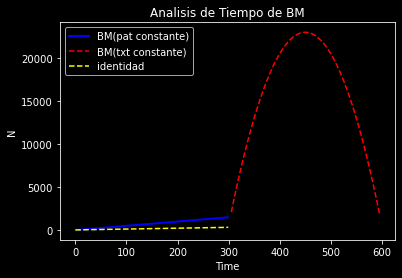

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
from cgitb import text

NO_CHARACTERS = 256


def badCharH(P):
    sizeP = len(P)
    bmBc = [0] * NO_CHARACTERS
    for i in range(NO_CHARACTERS):
        bmBc[i] = sizeP
    for i in range(sizeP-1):
        bmBc[ord(P[i])] = sizeP - i - 1
    return bmBc


def suffixes(P):
    sizeP = len(P)
    suff = [0] * sizeP
    f = 0
    g = sizeP - 1
    suff[sizeP - 1] = sizeP
    for i in range(sizeP-2, -1, -1):
        if i > g and suff[i + sizeP - 1 - f] < i - g:
            suff[i] = suff[i + sizeP - 1 - f]
        else:
            if i < g:
                g = i
            f = i
            while g >= 0 and P[g] == P[g + sizeP - 1 - f]:
                g = g - 1
            suff[i] = f - g
    return suff


def goodSuffixH(P):
    sizeP = len(P)
    bmGs = [0] * len(P)
    suff = suffixes(P)
    for i in range(sizeP):
        bmGs[i] = sizeP
    j = 0
    for i in range(sizeP-1, -1, -1):
        if suff[i] == i + 1:
            for j in range(sizeP - 1 - i):
                if bmGs[j] == sizeP:
                    bmGs[j] = sizeP - 1 - i
    for i in range(sizeP-2+1):
        bmGs[sizeP - 1 - suff[i]] = sizeP - 1 - i
    return bmGs


def BM_instrumentada(P, T):
    cont = 0
    sizeP = len(P)
    sizeT = len(T)
    bmBc = badCharH(P)
    bmGs = goodSuffixH(P)
    i = 0
    j = 0
    while(j <= sizeT - sizeP):
        cont += 1
        i = sizeP - 1
        while (i != -1 and P[i] == T[i+j]):
            cont += 1
            i = i - 1
        if(i < 0):
            cont += 1
            j += bmGs[0]
        else:
            j += max(bmGs[i], bmBc[ord(T[i+j])] - sizeP + 1 + i)
    return cont


'''
def test_BM_instrumentada(init, maxi, inc, filename):
    file = open(filename, 'w')
    file.write('n;m;time\n')
    for i in range(init, maxi, inc):
        txt = ['A'] * i
        pat = ['A'] * 5
        file.write(f"{i};{5};{BM_instrumentada(pat, txt)}\n")

test_BM_instrumentada(10, 150, 5, 'datosBMpatConstante.csv')
'''


def test_BM_instrumentado(filename, start, end, inc):
    graph = [[], [], [], []]
    for i in range(start, end, inc):
        txt = "a" * i
        pat = "aaa"

        graph[0].append(len(txt) + len(pat))
        graph[1].append(BM_instrumentada(pat, txt))

        txt2 = "a" * 300
        pat2 = "a" * i
        graph[2].append(len(txt2) + len(pat2))
        graph[3].append(BM_instrumentada(pat2, txt2))
    return graph


g = test_BM_instrumentado('BM_instrumentado.csv', 5, 300, 5)
tempX = list(range(300))
plt.plot(g[0], g[1], color="blue", label="BM(pat constante)", linewidth=2.0)
plt.plot(g[2], g[3], '--', color="red", label="BM(txt constante)")
plt.plot(tempX, tempX, '--', color='yellow', label="identidad")
plt.legend()
plt.xlabel('Time')
plt.ylabel("N")
plt.title("Analisis de Tiempo de BM")
plt.show()

In [ ]:
ALPHABET_SIZE = 256

def suffixes(pat):
    patlen = len(pat)
    suff = [0 for i in range(patlen)]
    suff[patlen-1] = patlen
    g = patlen - 1
    f = 0
    for i in range(patlen-2, -1, -1):
        if i > g and suff[i + patlen - 1 - f] < i-g:
            suff[i] = suff[i + patlen - 1 - f]
        else:
            if i < g:
                g = i
            f = i
            while g >= 0 and pat[g] == pat[g + patlen - 1 - f]:
                g -= 1
            suff[i] = f-g
    return suff

def bm(pat, txt):
    sizeP = len(pat)
    sizeT = len(txt)
    ocurrences = []

    # --- 1. BAD CHARACTER TABLE ---
    bcT = []
    # This part is changed on the instrumentation section. Here we use List Comprehension.
    bcT = [sizeP for i in range(ALPHABET_SIZE)]
    for j in range(sizeP):
        bcT[ord(pat[j])] = sizeP - j

    # --- 2. GOOD SUFFIX TABLE ---
    gsT = []
    suff = suffixes(pat)
    gsT = [sizeP for i in range(sizeP)]
    for i in range(sizeP-1, -1, -1):
        if suff[i] == i+1:
            for j in range(0, sizeP-1-i):
                if gsT[j] == sizeP:
                    gsT[j] = sizeP - 1 - i
    for i in range(0, sizeP-1):
        gsT[sizeP-1-suff[i]] = sizeP - 1 - i

    # --- 3. SEARCH STAGE ---
    for i in range(0, sizeT-sizeP+1):
        submatch = 0
        for j in range(sizeP-1, -1, -1):
            if(pat[j] != txt[i+j]):
                break
            submatch += 1
        if submatch == sizeP:
            ocurrences.append(f"Ocurrence at index {i}!")
        else:
            i += max(bcT[ord(txt[i+j])], gsT[j])

    return ocurrences

In [ ]:
### Codigo final

def bm(pat, txt):
    sizeP = len(pat)
    sizeT = len(txt)
    ocurrences = []

    # --- 0. SUFFIXES TABLE ---
    suff = [0 for i in range(sizeP)]
    suff[sizeP-1] = sizeP
    g = sizeP - 1
    f = 0
    for i in range(sizeP-2, -1, -1):
        if i > g and suff[i + sizeP - 1 - f] < i-g:
            suff[i] = suff[i + sizeP - 1 - f]
        else:
            if i < g:
                g = i
            f = i
            while g >= 0 and pat[g] == pat[g + sizeP - 1 - f]:
                g -= 1
            suff[i] = f-g

    # --- 1. BAD CHARACTER TABLE ---
    bcT = []
    # This part is changed on the instrumentation section. Here we use List Comprehension.
    bcT = [sizeP for i in range(ALPHABET_SIZE)]
    for j in range(sizeP):
        bcT[ord(pat[j])] = sizeP - j

    # --- 2. GOOD SUFFIX TABLE ---
    gsT = []
    gsT = [sizeP for i in range(sizeP)]
    for i in range(sizeP-1, -1, -1):
        if suff[i] == i+1:
            for j in range(0, sizeP-1-i):
                if gsT[j] == sizeP:
                    gsT[j] = sizeP - 1 - i
    for i in range(0, sizeP-1):
        gsT[sizeP-1-suff[i]] = sizeP - 1 - i

    # --- 3. SEARCH STAGE ---
    for i in range(0, sizeT-sizeP+1):
        submatch = 0
        for j in range(sizeP-1, -1, -1):
            if(pat[j] != txt[i+j]):
                break
            submatch += 1
        if submatch == sizeP:
            ocurrences.append(f"Ocurrence at index {i}!")
        else:
            i += max(bcT[ord(txt[i+j])], gsT[j])
    return ocurrences
# https://www-igm.univ-mlv.fr/~lecroq/string/node14.html
# https://www.cs.utexas.edu/users/moore/publications/fstrpos.pdf 
# http://pages.di.unipi.it/pisanti/DIDATTICA/patternmatching2.pdf 